In [1]:
import numpy as np
import rasterio
from os import listdir
import keras
from keras.utils import np_utils
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, LeakyReLU
import matplotlib.pyplot as plt
from keras.optimizers import adam
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import tensorflow as tf

Using TensorFlow backend.


In [2]:
extension = "tif"
aval_images_path = ["images/aval_images", "28112020/data1/aval_134", "28112020/data3/images/aval_043"]
non_aval_images_path = ["images/noaval_images", "28112020/Data1/noaval_134", "28112020/data3/images/no aval_043/images"]
total_aval_files = 0
total_non_aval_files = 0
row_length = 170
column_length = 130

In [3]:
# temp = "images/noaval_images/N1.tif"
# dataset = rasterio.open(temp)
# # dataset.index

In [4]:
final_dataset = []

In [5]:
def change_shape(band_array):
    temp = np.zeros((row_length, column_length))
    row = band_array.shape[0]
    col = band_array.shape[1]
    temp[:row,:col] = band_array
    return temp

In [6]:
def band_extract(dataset):
    
    band_array = []
    
    for i in range(1,5):
        band = dataset.read(i)
        band = np.array(band)
        band = change_shape(band)
        band_array.append(band)
    
    return band_array

In [7]:
for aval_image_path in aval_images_path:
    for file in listdir(aval_image_path):
        if file.endswith('.' + extension):
            total_aval_files += 1
            imageio
            #print(file_path)
            dataset = rasterio.open(file_path)
            band_array = band_extract(dataset)
            band_array = np.array(band_array)
    #         band_array = change_shape(band_array)
    #         print(band_array.shape)
            final_dataset.append(band_array)

In [8]:
for non_aval_image_path in non_aval_images_path:
    for file in listdir(non_aval_image_path):
        if file.endswith('.' + extension):
            total_non_aval_files += 1
            file_path = non_aval_image_path + "/" + file
            #print(file_path)
            dataset = rasterio.open(file_path)
            band_array = band_extract(dataset)
            band_array = np.array(band_array)
            final_dataset.append(band_array)

In [9]:
final_dataset = np.array(final_dataset)
final_dataset[final_dataset < 0] = 0

In [10]:
max_val = np.max(final_dataset)

In [11]:
final_val=[]
one = [1]
zero = [0]

for i in range(0,total_aval_files):
    final_val.append(one)

for i in range(0,total_non_aval_files):
    final_val.append(zero)

In [12]:
X_data = np.array(final_dataset)
Y_data = np.array(final_val)

In [13]:
X_data = X_data / max_val

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data)

In [15]:
n_classes = 2
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(4, row_length, column_length)))

In [18]:
# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

In [19]:
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

In [20]:
# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(250, activation='relu'))
# model.add(Dropout(0.5))
model.add(LeakyReLU(alpha=0.01))
# output layer
model.add(Dense(n_classes, activation='softmax'))

In [21]:
learning_rate = 0.001
epochs = 200
decay_rate = learning_rate / epochs
momentum = 0.8

In [22]:
# compiling the sequential model
# opt1 = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=decay_rate)
opt = adam(lr=learning_rate, decay=decay_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

# training the model for 100 epochs
history=model.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data=(x_test, y_test))

Train on 105 samples, validate on 35 samples
Epoch 1/200
105/105 [==============================] - 1s 5ms/step - loss: 0.7133 - accuracy: 0.4952 - val_loss: 0.5814 - val_accuracy: 0.6286
Epoch 2/200
105/105 [==============================] - 0s 3ms/step - loss: 0.6411 - accuracy: 0.5619 - val_loss: 0.5386 - val_accuracy: 0.6286
Epoch 3/200
105/105 [==============================] - 0s 3ms/step - loss: 0.6039 - accuracy: 0.6190 - val_loss: 0.5004 - val_accuracy: 0.6286
Epoch 4/200
105/105 [==============================] - 0s 3ms/step - loss: 0.5909 - accuracy: 0.6286 - val_loss: 0.4812 - val_accuracy: 0.6286
Epoch 5/200
105/105 [==============================] - 0s 3ms/step - loss: 0.6015 - accuracy: 0.6286 - val_loss: 0.5043 - val_accuracy: 0.6286
Epoch 6/200
105/105 [==============================] - 0s 3ms/step - loss: 0.5773 - accuracy: 0.6190 - val_loss: 0.5310 - val_accuracy: 0.6286
Epoch 7/200
105/105 [==============================] - 0s 3ms/step - loss: 0.5616 - accuracy: 0.6

Epoch 58/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4716 - accuracy: 0.6762 - val_loss: 0.8779 - val_accuracy: 0.6286
Epoch 59/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4662 - accuracy: 0.6762 - val_loss: 0.9568 - val_accuracy: 0.6286
Epoch 60/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4692 - accuracy: 0.6762 - val_loss: 1.0299 - val_accuracy: 0.6286
Epoch 61/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4700 - accuracy: 0.6857 - val_loss: 0.7742 - val_accuracy: 0.6000
Epoch 62/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.6571 - val_loss: 0.5457 - val_accuracy: 0.6000
Epoch 63/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4688 - accuracy: 0.7048 - val_loss: 0.4489 - val_accuracy: 0.6571
Epoch 64/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4678 - accuracy: 0.7048 - val_loss: 0.4486 - val_accuracy:

Epoch 115/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4672 - accuracy: 0.6762 - val_loss: 0.9168 - val_accuracy: 0.6000
Epoch 116/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4644 - accuracy: 0.6952 - val_loss: 0.9497 - val_accuracy: 0.6000
Epoch 117/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4688 - accuracy: 0.6667 - val_loss: 0.9812 - val_accuracy: 0.5714
Epoch 118/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4651 - accuracy: 0.6857 - val_loss: 1.0114 - val_accuracy: 0.5714
Epoch 119/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4697 - accuracy: 0.6762 - val_loss: 1.0393 - val_accuracy: 0.5714
Epoch 120/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4675 - accuracy: 0.6571 - val_loss: 1.0608 - val_accuracy: 0.5714
Epoch 121/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4630 - accuracy: 0.6857 - val_loss: 1.0809 - val_ac

Epoch 172/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4663 - accuracy: 0.6762 - val_loss: 0.7592 - val_accuracy: 0.6000
Epoch 173/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.6667 - val_loss: 0.7609 - val_accuracy: 0.6000
Epoch 174/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4680 - accuracy: 0.6762 - val_loss: 0.7624 - val_accuracy: 0.6000
Epoch 175/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4616 - accuracy: 0.6762 - val_loss: 0.7643 - val_accuracy: 0.6000
Epoch 176/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4660 - accuracy: 0.6857 - val_loss: 0.7664 - val_accuracy: 0.6000
Epoch 177/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4651 - accuracy: 0.6857 - val_loss: 0.7684 - val_accuracy: 0.6000
Epoch 178/200
105/105 [==============================] - 0s 3ms/step - loss: 0.4651 - accuracy: 0.6857 - val_loss: 0.7706 - val_ac

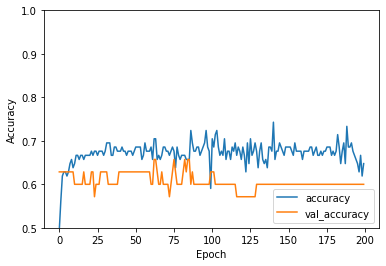

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [24]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

mse_train = ((y_train_pred - y_train) ** 2).mean()
mse_test = ((y_test_pred - y_test) ** 2).mean()
print("Loss: %5.4f - val_loss: %5.4f" % (mse_train, mse_test))

Loss: 0.1688 - val_loss: 0.2199


In [25]:
y_pred = model.predict(x_test)
y_classes_pred = y_pred.argmax(axis=-1)
print(y_classes_pred)

[0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [26]:
y_classes_test = y_test.argmax(axis=-1)

In [27]:
print(model.predict(x_test))

[[1.0000000e+00 4.1820588e-33]
 [5.1055807e-01 4.8944193e-01]
 [5.1055813e-01 4.8944187e-01]
 [5.1055813e-01 4.8944187e-01]
 [5.1055813e-01 4.8944190e-01]
 [1.7592332e-27 1.0000000e+00]
 [5.1055807e-01 4.8944193e-01]
 [5.1055807e-01 4.8944199e-01]
 [5.1055813e-01 4.8944193e-01]
 [1.0000000e+00 0.0000000e+00]
 [5.1055813e-01 4.8944190e-01]
 [5.1055813e-01 4.8944187e-01]
 [5.1055807e-01 4.8944193e-01]
 [6.2126904e-10 1.0000000e+00]
 [1.0000000e+00 7.7441959e-30]
 [5.1055801e-01 4.8944196e-01]
 [1.0000000e+00 2.8265515e-10]
 [9.9717414e-01 2.8258222e-03]
 [1.0000000e+00 6.8614274e-36]
 [1.1880449e-01 8.8119555e-01]
 [5.0586939e-04 9.9949408e-01]
 [3.0924585e-01 6.9075412e-01]
 [5.1055813e-01 4.8944187e-01]
 [5.1055807e-01 4.8944193e-01]
 [5.1055813e-01 4.8944187e-01]
 [5.1055813e-01 4.8944193e-01]
 [5.1055777e-01 4.8944223e-01]
 [5.1055813e-01 4.8944187e-01]
 [9.8673707e-01 1.3262976e-02]
 [5.1055813e-01 4.8944187e-01]
 [1.0000000e+00 2.5743591e-11]
 [5.1055813e-01 4.8944190e-01]
 [7.7517

In [28]:
confusion_matrix(y_classes_test, y_classes_pred)

array([[16,  1],
       [13,  5]], dtype=int64)

In [29]:
accuracy_score(y_classes_test, y_classes_pred)

0.6